In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\singhy\AppData\Local\Temp\ipykernel_25564\2246146526.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

In [3]:
data = pd.read_csv(f"{output_dir}/data/historical_data.csv")

In [4]:
data['date'] = pd.to_datetime(data['date'])

# Historical Figures 

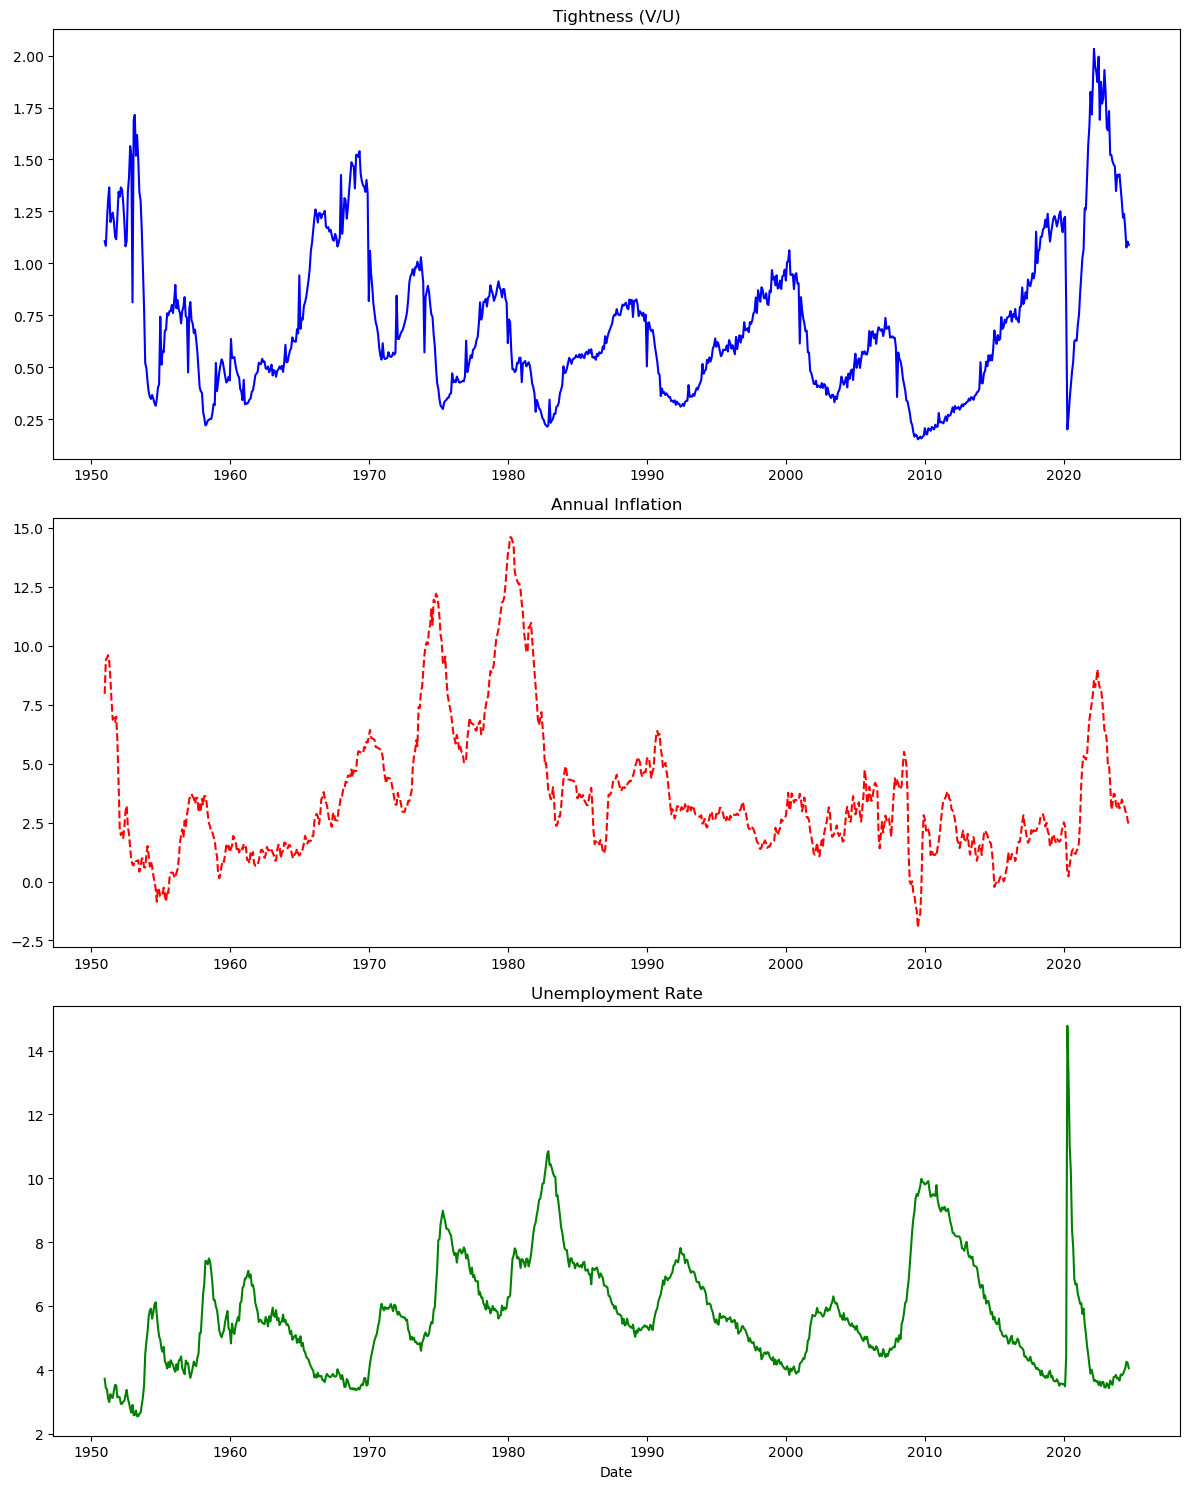

In [5]:

# Create a new figure
plt.figure(figsize=(12, 15))

# Plot Tightness
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(data['date'], data['tightness'], linestyle='-', color='b')
plt.title('Tightness (V/U)')

# Plot Inflation
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(data['date'], data['P_12m_change'], linestyle='--', color='r')
plt.title('Annual Inflation')

# Plot Unemployment Rate
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(data['date'], data['U_rate'], linestyle='-', color='g')
plt.xlabel('Date')
plt.title('Unemployment Rate')

# Adjust layout
plt.tight_layout()
plt.savefig(f"{output_dir}/figures/historical_time_series.pdf", format='pdf')
plt.show()


# Historical Regressions 

In [6]:
# Specify Time period 
reg_data = data[(data['date'] >= '1951-01-01') & (data['date'] <= '2019-12-01')]
reg_data = reg_data.copy()

In [7]:
reg_data.loc[:, 'U_rate_squared'] = reg_data['U_rate'] ** 2

In [8]:
# Specification 1 

covariates = ['U_rate']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['V_rate']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 1:', model.summary())

Specification 1:                             OLS Regression Results                            
Dep. Variable:                 V_rate   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     257.5
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.23e-50
Time:                        09:27:02   Log-Likelihood:                -928.97
No. Observations:                 828   AIC:                             1862.
Df Residuals:                     826   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8120      0.094   

In [9]:
# Specification 2
covariates = ['U_rate', 'P_12m_change']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['V_rate']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 2:', model.summary())

Specification 2:                             OLS Regression Results                            
Dep. Variable:                 V_rate   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     345.9
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          7.86e-110
Time:                        09:27:02   Log-Likelihood:                -789.16
No. Observations:                 828   AIC:                             1584.
Df Residuals:                     825   BIC:                             1598.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5291      0.

In [10]:
# Specification 3 
covariates = ['U_rate', 'U_rate_squared', 'P_12m_change']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['V_rate']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 3:', model.summary())

Specification 3:                             OLS Regression Results                            
Dep. Variable:                 V_rate   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     235.2
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          3.22e-110
Time:                        09:27:03   Log-Likelihood:                -785.19
No. Observations:                 828   AIC:                             1578.
Df Residuals:                     824   BIC:                             1597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1642  

In [11]:
# Specification 4 

covariates = ['U_rate']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['tightness']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 4:', model.summary())

Specification 4:                             OLS Regression Results                            
Dep. Variable:              tightness   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1686.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.08e-201
Time:                        09:27:03   Log-Likelihood:                 266.13
No. Observations:                 828   AIC:                            -528.3
Df Residuals:                     826   BIC:                            -518.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5305      0.022   

In [12]:
# Specification 5
covariates = ['U_rate', 'P_12m_change']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['tightness']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 5:', model.summary())

Specification 5:                             OLS Regression Results                            
Dep. Variable:              tightness   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1042.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.77e-226
Time:                        09:27:03   Log-Likelihood:                 327.36
No. Observations:                 828   AIC:                            -648.7
Df Residuals:                     825   BIC:                            -634.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4842      0.

In [13]:
# Specification 6 
covariates = ['U_rate', 'U_rate_squared', 'P_12m_change']

X = sm.add_constant(reg_data[covariates]) 
y = reg_data['tightness']

model = sm.OLS(y,X).fit()

# Print summary
print('Specification 6:', model.summary())

Specification 6:                             OLS Regression Results                            
Dep. Variable:              tightness   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1355.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          4.77e-318
Time:                        09:27:04   Log-Likelihood:                 542.92
No. Observations:                 828   AIC:                            -1078.
Df Residuals:                     824   BIC:                            -1059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5604  

# Residual Analysis

In [14]:
# Prepare the data

# Residualizing Inflation 
X = sm.add_constant(reg_data[['U_rate', 'U_rate_squared']])  
y = reg_data['P_12m_change'] 

model = sm.OLS(y, X).fit()

# Get residuals and add them to your dataframe
reg_data['inflation_residuals'] = model.resid


# Residualizing Vacancy to Unemployment Rate 
X = sm.add_constant(reg_data[['U_rate', 'U_rate_squared']])  
y = reg_data['tightness']  

# Fit the regression
model = sm.OLS(y, X).fit()

reg_data['tightness_residuals'] = model.resid

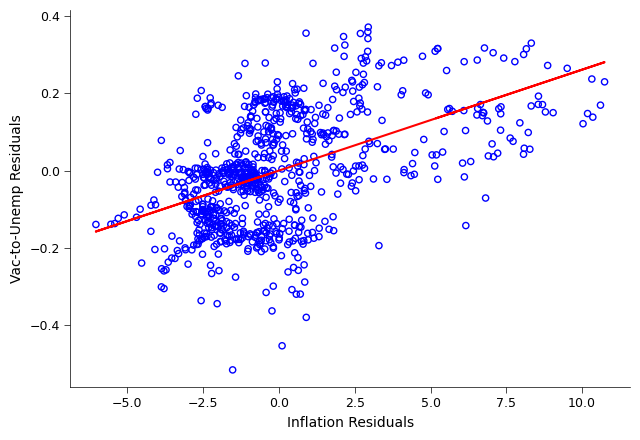

In [23]:
# Set figure style for AER
plt.style.use('default')
fig, ax = plt.subplots(figsize=(6.5, 4.5))  # AER typically uses smaller figures

# Create scatter plot with blue outlines and no fill
ax.scatter(reg_data['inflation_residuals'], 
           reg_data['tightness_residuals'], 
           edgecolor='blue',  # Outline color
           facecolor='none',  # No fill color
           s=20)  # Smaller point size

# Calculate and add regression line in red
x = reg_data['inflation_residuals']
y = reg_data['tightness_residuals']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), color='red', linewidth=1.5)  # Regression line in red

# Customize axes and labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Add labels with proper formatting
ax.set_xlabel('Inflation Residuals', fontsize=10)
ax.set_ylabel('Vac-to-Unemp Residuals', fontsize=10)

# Remove grid
ax.grid(False)

# Set tick parameters
ax.tick_params(direction='out', length=4, width=0.5, labelsize=9)

# Adjust layout
plt.tight_layout()

# Optional: Save with high DPI for publication
plt.savefig(f"{output_dir}/figures/residuals_plot.pdf")

plt.show()

In [16]:
import statsmodels.api as sm
import numpy as np

def run_regression_get_latex(data, y_var, covariates):
    X = sm.add_constant(data[covariates])
    y = data[y_var]
    model = sm.OLS(y, X).fit()
    return model

# Create LaTeX table header
latex_table = """\\begin{table}[!htbp]
\\centering
\\caption{Regression Results}
\\label{tab:regressions}
\\begin{tabular}{lcccccc}
\\hline\\hline
& \\multicolumn{3}{c}{Vacancy Rate} & \\multicolumn{3}{c}{Labor Market Tightness} \\\\
\\cline{2-4} \\cline{5-7}
& (1) & (2) & (3) & (4) & (5) & (6) \\\\
\\hline
"""

# Define specifications
specs = [
    ('V_rate', ['U_rate']),
    ('V_rate', ['U_rate', 'P_12m_change']),
    ('V_rate', ['U_rate', 'U_rate_squared', 'P_12m_change']),
    ('tightness', ['U_rate']),
    ('tightness', ['U_rate', 'P_12m_change']),
    ('tightness', ['U_rate', 'U_rate_squared', 'P_12m_change'])
]

# Run all models and store results
models = [run_regression_get_latex(reg_data, y_var, covs) for y_var, covs in specs]

# Function to format coefficient with stars
def format_coef(coef, pval):
    coef_str = f"{coef:0.3f}"
    if pval < 0.01:
        coef_str += "^{***}"
    elif pval < 0.05:
        coef_str += "^{**}"
    elif pval < 0.1:
        coef_str += "^{*}"
    return coef_str

# Add coefficients to table
variables = ['Unemployment Rate', 'Inflation', 'Unemployment Rate$^2$', 'Constant']
var_mapping = {
    'U_rate': 'Unemployment Rate',
    'P_12m_change': 'Inflation',
    'U_rate_squared': 'Unemployment Rate$^2$',
    'const': 'Constant'
}

for var in ['U_rate', 'P_12m_change', 'U_rate_squared', 'const']:
    row = f"{var_mapping[var]} & "
    for model in models:
        if var in model.params:
            coef = format_coef(model.params[var], model.pvalues[var])
            se = f"({model.bse[var]:0.3f})"
            row += f"${coef}$ & "
            row += f"{se} & "
        else:
            row += "& & "
    row = row[:-2] + "\\\\"
    latex_table += row + "\n"

# Add R-squared and N
latex_table += "\\hline\n"
r2_row = "R$^2$ & "
n_row = "Observations & "
for model in models:
    r2_row += f"{model.rsquared:0.3f} & "
    n_row += f"{int(model.nobs)} & "
r2_row = r2_row[:-2] + "\\\\\n"
n_row = n_row[:-2] + "\\\\\n"
latex_table += r2_row
latex_table += n_row

# Add table footer
latex_table += """\\hline\\hline
\\multicolumn{7}{l}{\\textit{Note:} Standard errors in parentheses} \\\\
\\multicolumn{7}{l}{*** p$<$0.01, ** p$<$0.05, * p$<$0.1} \\\\
\\end{tabular}
\\end{table}"""

with open(f"{output_dir}/regressions/us_historical_regressions.tex", "w") as file:
    file.write(latex_table)


# Beveridge Curves - Supply Shocks

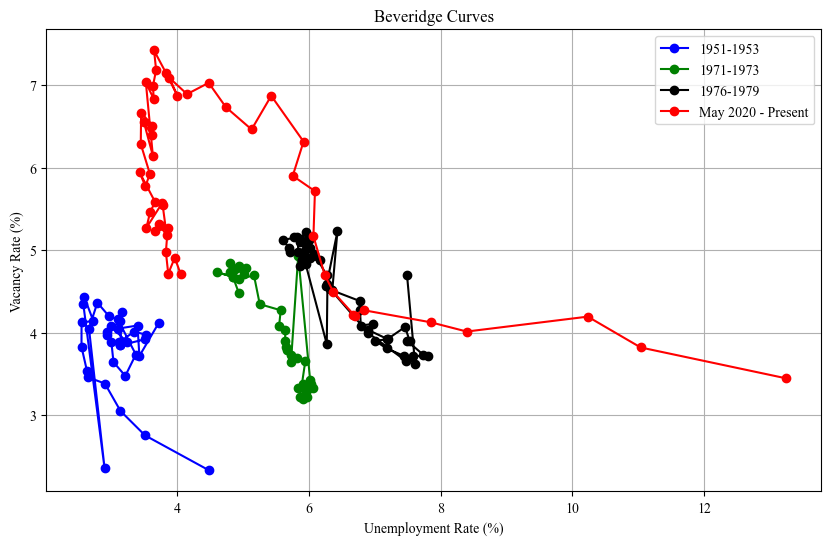

In [107]:
# Define the time periods
period1 = (data['date'] >= '1951-01-01') & (data['date'] <= '1953-12-01')
period2 = (data['date'] >= '1971-01-01') & (data['date'] <= '1973-12-31')
period3 = (data['date'] >= '1977-01-01') & (data['date'] <= '1980-12-31')
period4 = (data['date'] >= '2020-05-01')

# Filter data for each period
data_1972_1976 = data[period1]
data_1977_1982 = data[period2]
data_1976_1979 = data[period3]
data_2020_present = data[period4]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

plt.plot(data_1972_1976['U_rate'], data_1972_1976['V_rate'], marker='o', linestyle='-', color='b', label='1951-1953')
plt.plot(data_1977_1982['U_rate'], data_1977_1982['V_rate'], marker='o', linestyle='-', color='g', label='1971-1973')

plt.plot(data_1976_1979['U_rate'], data_1976_1979['V_rate'], marker='o', linestyle='-', color='k', label='1976-1980')
plt.plot(data_2020_present['U_rate'], data_2020_present['V_rate'], marker='o', linestyle='-', color='r', label='May 2020 - Present')

# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate (%)')
plt.title('Beveridge Curves')
plt.grid(True)
plt.legend()
plt.show()


# Beveridge Curves during demand shocks 

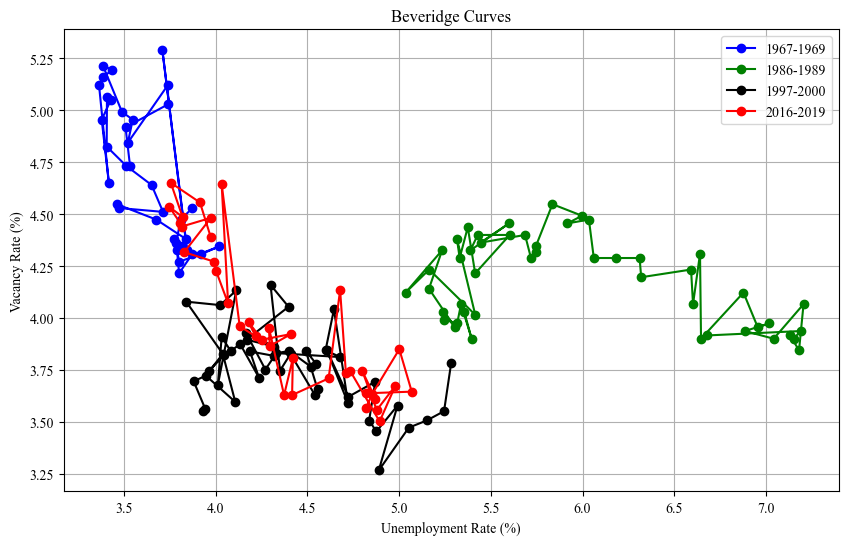

In [108]:
# Define the time periods
period1 = (data['date'] >= '1967-01-01') & (data['date'] <= '1969-12-01')
period2 = (data['date'] >= '1986-01-01') & (data['date'] <= '1989-12-31')
period3 = (data['date'] >= '1997-01-01') & (data['date'] <= '2000-12-31')
period4 = (data['date'] >= '2016-01-01') & (data['date'] <= '2019-01-01')

# Filter data for each period
data_1972_1976 = data[period1]
data_1977_1982 = data[period2]
data_1976_1979 = data[period3]
data_2020_present = data[period4]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

plt.plot(data_1972_1976['U_rate'], data_1972_1976['V_rate'], marker='o', linestyle='-', color='b', label='1967-1969')
plt.plot(data_1977_1982['U_rate'], data_1977_1982['V_rate'], marker='o', linestyle='-', color='g', label='1986-1989')
plt.plot(data_1976_1979['U_rate'], data_1976_1979['V_rate'], marker='o', linestyle='-', color='k', label='1997-2000')
plt.plot(data_2020_present['U_rate'], data_2020_present['V_rate'], marker='o', linestyle='-', color='r', label='2016-2019')

# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate (%)')
plt.title('Beveridge Curves')
plt.grid(True)
plt.legend()
plt.show()

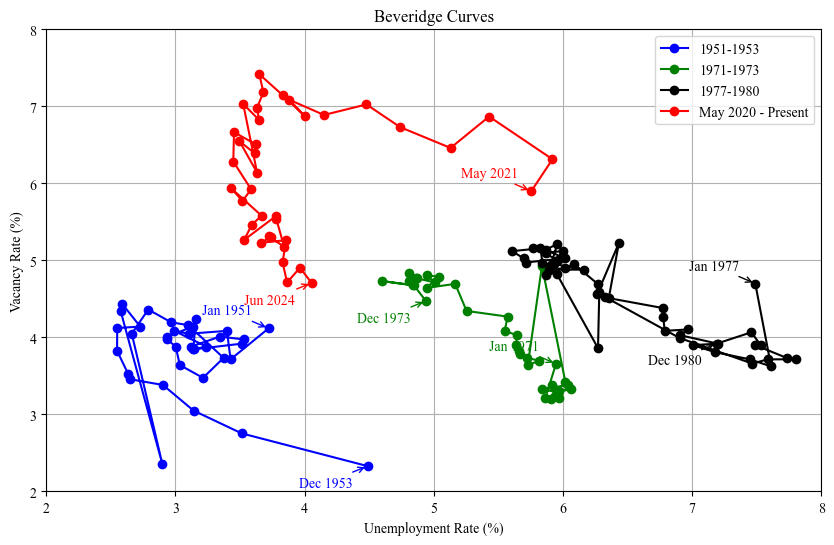

In [21]:
# Define the time periods
period1 = (data['date'] >= '1951-01-01') & (data['date'] <= '1953-12-01')
period2 = (data['date'] >= '1971-01-01') & (data['date'] <= '1973-12-31')
period3 = (data['date'] >= '1977-01-01') & (data['date'] <= '1980-12-31')
period4 = (data['date'] >= '2021-05-01')

# Filter data for each period
data_1972_1976 = data[period1]
data_1977_1982 = data[period2]
data_1976_1979 = data[period3]
data_2020_present = data[period4]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

# Plot each period's curve with annotations
for dataset, color, label in zip(
    [data_1972_1976, data_1977_1982, data_1976_1979, data_2020_present],
    ['b', 'g', 'k', 'r'],
    ['1951-1953', '1971-1973', '1977-1980', 'May 2020 - Present']
):
    plt.plot(dataset['U_rate'], dataset['V_rate'], marker='o', linestyle='-', color=color, label=label)
    
    # Annotate the start point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[0].strftime('%b %Y')}",  # Start point label
                 (dataset['U_rate'].iloc[0], dataset['V_rate'].iloc[0]),
                 textcoords="offset points", xytext=(-30, 10), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

    # Annotate the end point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[-1].strftime('%b %Y')}",  # End point label
                 (dataset['U_rate'].iloc[-1], dataset['V_rate'].iloc[-1]),
                 textcoords="offset points", xytext=(-30, -15), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))
    

# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate (%)')
plt.title('Beveridge Curves')
plt.ylim(2,8)
plt.xlim(2,8)
plt.grid(True)
plt.legend()
plt.show()


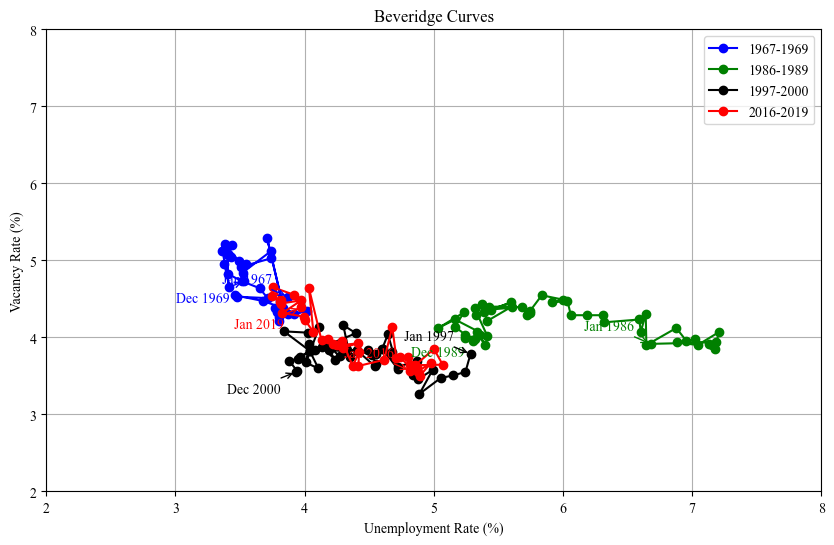

In [124]:
# Define the time periods
period1 = (data['date'] >= '1967-01-01') & (data['date'] <= '1969-12-01')
period2 = (data['date'] >= '1986-01-01') & (data['date'] <= '1989-12-31')
period3 = (data['date'] >= '1997-01-01') & (data['date'] <= '2000-12-31')
period4 = (data['date'] >= '2016-01-01') & (data['date'] <= '2019-01-01')

# Filter data for each period
data_1967_1969 = data[period1]
data_1986_1989 = data[period2]
data_1997_2000 = data[period3]
data_2016_2019 = data[period4]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

# Plot each period's curve with annotations
for dataset, color, label in zip(
    [data_1967_1969, data_1986_1989, data_1997_2000, data_2016_2019],
    ['b', 'g', 'k', 'r'],
    ['1967-1969', '1986-1989', '1997-2000', '2016-2019']
):
    plt.plot(dataset['U_rate'], dataset['V_rate'], marker='o', linestyle='-', color=color, label=label)
    
    # Annotate the start point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[0].strftime('%b %Y')}",  # Start point label
                 (dataset['U_rate'].iloc[0], dataset['V_rate'].iloc[0]),
                 textcoords="offset points", xytext=(-30, 10), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

    # Annotate the end point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[-1].strftime('%b %Y')}",  # End point label
                 (dataset['U_rate'].iloc[-1], dataset['V_rate'].iloc[-1]),
                 textcoords="offset points", xytext=(-30, -15), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate (%)')
plt.title('Beveridge Curves')
plt.ylim(2,8)
plt.xlim(2,8)
plt.grid(True)
plt.legend()
plt.show()


In [112]:
data

,date,P_12m_change,U_rate,V_rate,tightness,ln_tightness
0,1951-01-01,7.954062,3.721283,4.118172,1.106654,0.101341
1,1951-02-01,9.402795,3.426786,3.716030,1.084407,0.081033
2,1951-03-01,9.475465,3.398586,4.085784,1.202201,0.184154
3,1951-04-01,9.598309,3.104776,4.048809,1.304058,0.265481
4,1951-05-01,9.339504,2.991425,4.085784,1.365832,0.311764
...,...,...,...,...,...,...
877,2024-02-01,3.165743,3.857226,5.263818,1.364664,0.310908
878,2024-03-01,3.475131,3.829179,4.976324,1.299580,0.262041
879,2024-04-01,3.357731,3.864677,4.714168,1.219809,0.198694
880,2024-05-01,3.250210,3.964062,4.906637,1.237780,0.213320


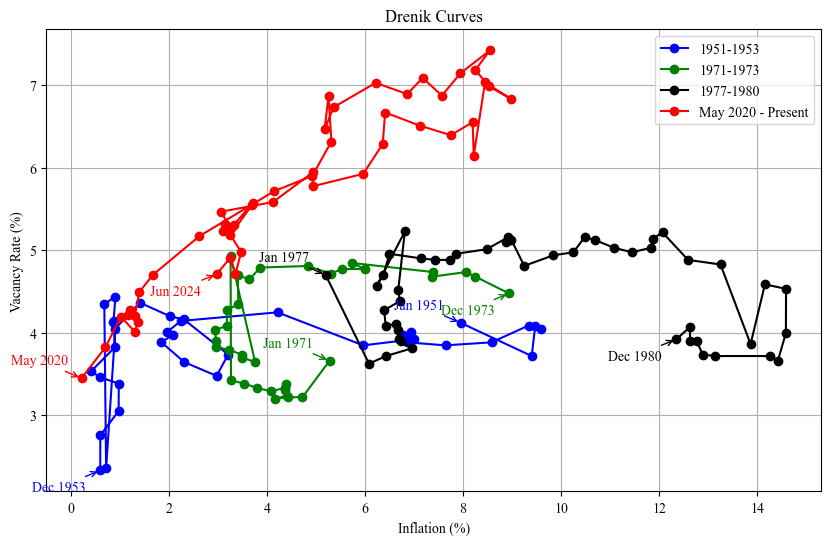

In [114]:
# Define the time periods
period1 = (data['date'] >= '1951-01-01') & (data['date'] <= '1953-12-01')
period2 = (data['date'] >= '1971-01-01') & (data['date'] <= '1973-12-31')
period3 = (data['date'] >= '1977-01-01') & (data['date'] <= '1980-12-31')
period4 = (data['date'] >= '2020-05-01')

# Filter data for each period
data_1972_1976 = data[period1]
data_1977_1982 = data[period2]
data_1976_1979 = data[period3]
data_2020_present = data[period4]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

# Plot each period's curve with annotations
for dataset, color, label in zip(
    [data_1972_1976, data_1977_1982, data_1976_1979, data_2020_present],
    ['b', 'g', 'k', 'r'],
    ['1951-1953', '1971-1973', '1977-1980', 'May 2020 - Present']
):
    plt.plot(dataset['P_12m_change'], dataset['V_rate'], marker='o', linestyle='-', color=color, label=label)
    
    # Annotate the start point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[0].strftime('%b %Y')}",  # Start point label
                 (dataset['P_12m_change'].iloc[0], dataset['V_rate'].iloc[0]),
                 textcoords="offset points", xytext=(-30, 10), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

    # Annotate the end point with an arrow pointer
    plt.annotate(f"{dataset['date'].iloc[-1].strftime('%b %Y')}",  # End point label
                 (dataset['P_12m_change'].iloc[-1], dataset['V_rate'].iloc[-1]),
                 textcoords="offset points", xytext=(-30, -15), ha='center', color=color,
                 arrowprops=dict(arrowstyle="->", color=color))

# Labeling
plt.xlabel('Inflation (%)')
plt.ylabel('Vacancy Rate (%)')
plt.title('Drenik Curves')
plt.grid(True)
plt.legend()
plt.show()
